# Linear Regression

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Approach by Generating data from scratch

Assume that we have a problem like a company want to calculate money for each kilometers

| Kilometers    | Money  (*1000 VND) |
| ---           | ---                |
| 2             | 13                 |
| 7             | 35                 |
| 9             | 41                 |
| 3             | 19                 |
| 10            | 45                 |
| 6             | 28                 |
| 1             | 10                 |
| 8             | 55                 |
| 5             | 8                  |
| 20            | 70                 |

In [34]:
# Generate data

X0 = np.array([[2], [7], [9], [3], [10], [6], [1], [8], [5], [20]])
ones = np.ones_like(X0)

X = np.concatenate((X0, ones), axis=1)
X

array([[ 2,  1],
       [ 7,  1],
       [ 9,  1],
       [ 3,  1],
       [10,  1],
       [ 6,  1],
       [ 1,  1],
       [ 8,  1],
       [ 5,  1],
       [20,  1]])

In [35]:
Y = np.array([[13], [35], [41], [19], [45], [28], [10], [55], [8], [70]])
Y

array([[13],
       [35],
       [41],
       [19],
       [45],
       [28],
       [10],
       [55],
       [ 8],
       [70]])

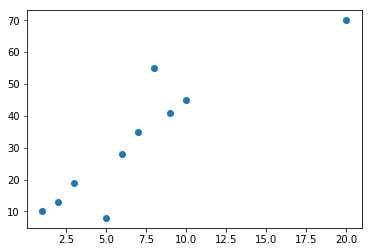

In [36]:
plt.scatter(X0,Y); 
plt.show()

# 2. Normal Equation with library (scikit-learn)

In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)
pred = reg.predict(X)
pred

array([[14.98414496],
       [32.05851265],
       [38.88825972],
       [18.3990185 ],
       [42.30313326],
       [28.64363911],
       [11.56927142],
       [35.47338618],
       [25.22876557],
       [76.45186863]])

In [38]:
reg.score(X,Y)

0.8052066003900803

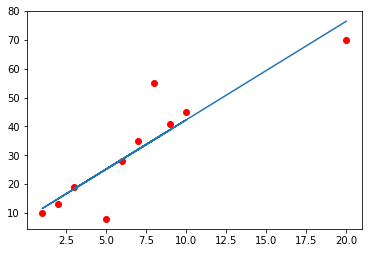

In [39]:
# See how it fits:
plt.scatter(X0, Y, color='red')
plt.plot(X0, pred)
plt.show()

# 3. Normal Equation from scratch

Normal equation: $\theta=(X^TX)^{-1}X^Ty$
<br>So, we need to find Theta $\theta$, rite?

In [40]:
# np.linalg.inv() for matrix inverse.

theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

In [41]:
# This is result of Theta that we are finding.
theta

array([[3.41487354],
       [8.15439789]])

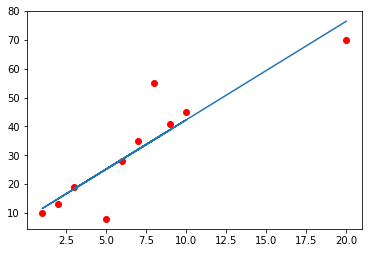

In [42]:
plt.scatter(X0, Y, color='red')
plt.plot(X0, theta[0]*X0 + theta[1])
plt.show()

# 4. Approach with Simple Linear Regression from Scratch

## 4.1. Batch Gradient Descent

In [64]:
# Initialize Theta by Normal Distribution

theta_gd = np.random.normal(size=2).reshape([2,1])

theta_gd

array([[-0.50207979],
       [-0.95527407]])

In [65]:
# Set learning rate = 0.02

learning_rate = 0.02

In [66]:
# Number of samples

m = X.shape[0]
m

10

**Batch Gradient Descent**: $\triangledown J(\theta) = \frac{1}{m}X^T(X\theta - y)$

In [67]:
def batch_grad(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """    
    g = 1/m * X.T.dot(X.dot(theta_gd) - Y)
    return g.reshape(theta_gd.shape)

How can we calculate **Loss function**? Check this: $J(\theta) = \frac{1}{2m} \left \| X\theta - y \right \|^2 = \frac{1}{2m} \sum\limits_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum\limits_{i=1}^m(\theta^Tx^{(i)} - y^{(i)})^2$

In [55]:
def loss_funct(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """
    return 1/(2*m) * np.sum((X.dot(theta_gd) - Y)**2)

In [68]:
# Loop 500 times to calculate loss function with learning rate = 0.02
for i in range(500):
    grad_value = batch_grad(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    print(loss_funct(X, Y, theta_gd, m))

314.98457678475404
130.42365741145758
74.23765425618421
57.05193593829953
51.71560321814909
49.98053623212651
49.34103956746452
49.03589367560193
48.83382889409665
48.6645678849361
48.506741012198894
48.3538364543656
48.20385627739131
48.0561740774501
47.910580369077714
47.766992582613796
47.625366961552544
47.48567179456811
47.34787928028268
47.21196305247185
47.07789742488575
46.945657158513214
46.81521738760269
46.68655359395631
46.55964159593236
46.434457541959816
46.310977905465954
46.18917948027598
46.06903937619716
45.95053501470044
45.83364412467225
45.71834473822739
45.60461518657991
45.492434095970935
45.381780383651446
45.27263325392025
45.16497219421575
45.05877697126074
44.954027627260096
44.850704476149886
44.7487880998976
44.64825934485302
44.54909931814842
44.45128938414797
44.35481116094546
44.25964651690968
44.16577756727695
44.07318667078976
43.9818564263816
43.8917696699064
43.80290947091311
43.71525912946357
43.62880217299423
43.543522353220325
43.45940364308215
43

In [69]:
# Loss function is decrasing slowly
# Loop to calculate loss function with learning rate = 0.02
# Now you see we've reach the limitation.

learning_rate = 0.02

for i in range(500):
    grad_value = batch_grad(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    print(loss_funct(X, Y, theta_gd, m))

37.37874636358257
37.37856287777705
37.37838189018437
37.37820336679054
37.37802727404485
37.377853578853276
37.37768224857243
37.37751325100335
37.37734655438551
37.37718212739078
37.37701993911757
37.376859959085024
37.37670215722732
37.37654650388795
37.376392969814255
37.376241526151766
37.37609214443893
37.37594479660171
37.375799454948336
37.37565609216395
37.37551468130574
37.37537519579762
37.37523760942542
37.375101896331834
37.37496803101161
37.3748359883068
37.374705743401954
37.3745772718195
37.37445054941514
37.37432555237327
37.37420225720265
37.37408064073174
37.37396068010457
37.37384235277636
37.37372563650925
37.3736105093682
37.37349694971677
37.37338493621312
37.37327444780601
37.37316546373083
37.37305796350564
37.372951926927406
37.372847334068105
37.37274416527111
37.372642401147424
37.372542022571956
37.37244301068009
37.37234534686403
37.37224901276934
37.372153990291466
37.37206026157235
37.371967808997105
37.371876615190665
37.3717866630145
37.371697935563475

In [70]:
# Keep on checking with 500 Loops to calculate loss function with learning rate = 0.02
# Now you see we've reach the limitation.
for i in range(500):
    grad_value = batch_grad(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    print(loss_funct(X, Y, theta_gd, m))

37.36528412798016
37.36528393444144
37.365283743537816
37.36528355523338
37.365283369492765
37.365283186281076
37.36528300556385
37.36528282730717
37.36528265147748
37.36528247804177
37.36528230696745
37.36528213822234
37.36528197177474
37.36528180759339
37.3652816456474
37.365281485906365
37.365281328340245
37.36528117291942
37.365281019614734
37.365280868397306
37.365280719238754
37.36528057211103
37.36528042698651
37.36528028383789
37.36528014263828
37.36528000336116
37.36527986598033
37.36527973046997
37.36527959680464
37.36527946495918
37.36527933490885
37.36527920662919
37.3652790800961
37.365278955285795
37.36527883217482
37.36527871074002
37.365278590958596
37.36527847280804
37.36527835626614
37.36527824131098
37.36527812792098
37.36527801607483
37.36527790575147
37.36527779693021
37.36527768959056
37.365277583712405
37.36527747927579
37.36527737626111
37.365277274649024
37.365277174420406
37.36527707555642
37.365276978038516
37.36527688184833
37.36527678696779
37.3652766933790

In [50]:
# Keep on checking with 100 Loops to calculate loss function with learning rate = 0.02
# Now you see we've reach the limitation.
for i in range(100):
    grad_value = batch_grad(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    print(loss_funct(X, Y, theta_gd, m))

40.93475443480825
40.91041300799494
40.88623757295321
40.862226997733444
40.83838015810516
40.814695937504375
40.791173226981286
40.767810925148346
40.74460793812872
40.72156317950508
40.698675570268755
40.67594403876906
40.65336752066332
40.63094495886692
40.608675303503816
40.58655751185742
40.564590548321746
40.5427733843529
40.521104998421016
40.499584375962314
40.478210509331575
40.456982397755155
40.43589904728396
40.41495947074688
40.394162687704686
40.37350772440405
40.35299361373197
40.332619395170525
40.312384114751836
40.29228682501342
40.27232658495382
40.25250245998863
40.23281352190659
40.21325884882625
40.193837525152745
40.17454864153491
40.15539129482278
40.13636458802521
40.117467630267946
40.09869953675181
40.08005942871148
40.06154643337407
40.0431596839185
40.02489831943477
40.00676148488367
39.98874833105684
39.97085801453688
39.95308969765792
39.93544254846645
39.91791574068219
39.90050845365968
39.88321987234957
39.86604918726064
39.84899559442182
39.83205829534

In [71]:
print('Compare between Normal Equation & Batch Gradient Descent:')
print('Normal Equation from Scratch: ',theta)
print('Batch Gradient Descent: ',theta_gd)

Compare between Normal Equation & Batch Gradient Descent:
Normal Equation from Scratch:  [[3.41487354]
 [8.15439789]]
Batch Gradient Descent:  [[3.41490109]
 [8.15410082]]


The result is actually same because our data is not big. 

With **Batch Gradient Descent**, we initialize Theta with Random Distribution. This approach makes our first loss function is very big = 314.98457678475404

After that, we update Theta and as you can see, loss function is decreasing and converging to the extreme. When it converges to the extreme, it reaches the limitation and we need to update learning rate to make sure Loss fucntion won't increase.

Working with data will give us more experiences with each approach and know when we need to update learning rate.

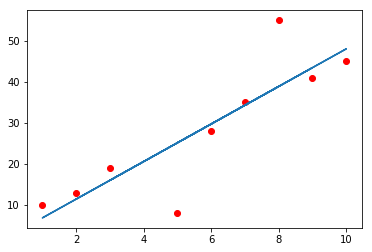

In [30]:
# Plot Batch Gradient Descent approach.

plt.scatter(X0, Y, color='red')
plt.plot(X0, theta_gd[0]*X0 + theta_gd[1])
plt.show()

## 4.2. Stochastic Gradient Descent - Updated later